In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
sns.set_style('whitegrid')
cmap = sns.color_palette("coolwarm", 7)

In [169]:
data = pd.read_csv('winemag-data_first150k.csv')

In [35]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [176]:
data.drop(data.columns[0],axis=1,inplace=True)

In [37]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [38]:
data.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [177]:
data.nunique()

country           48
description    97821
designation    30621
points            21
price            357
province         455
region_1        1236
region_2          18
variety          632
winery         14810
dtype: int64

In [40]:
data.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [41]:
data.isnull().sum(axis=0)

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [42]:
#Exploring 'country' column

In [43]:
data['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'], dtype=object)

In [44]:
top_country = pd.DataFrame(data.groupby('country')['points'].count().sort_values(ascending=False))

In [45]:
top_country.columns = ['count']

In [46]:
top_country.head()

,count
country,
US,62397
Italy,23478
France,21098
Spain,8268
Chile,5816


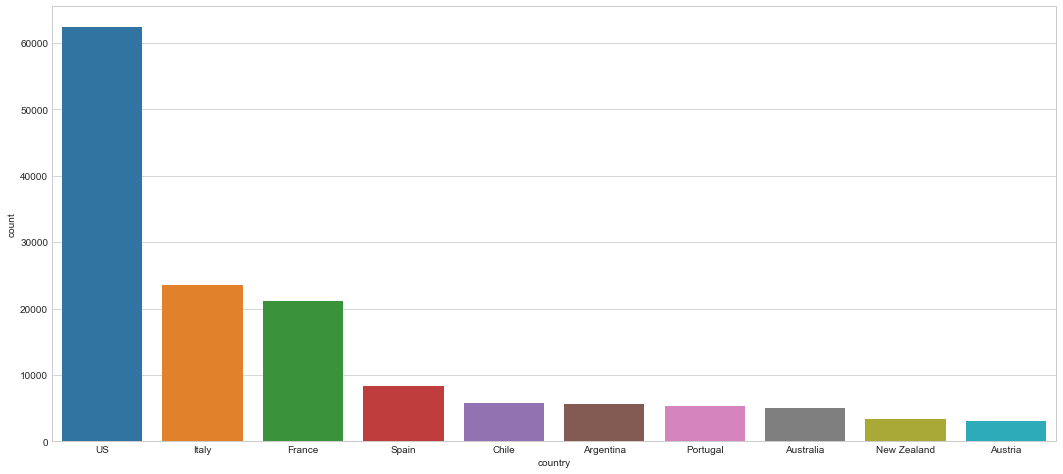

In [47]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_country.index[:10],y='count',data = top_country.head(10))

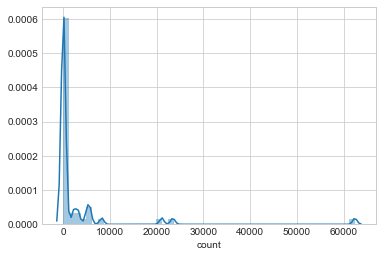

In [48]:
sns.distplot(top_country['count'])

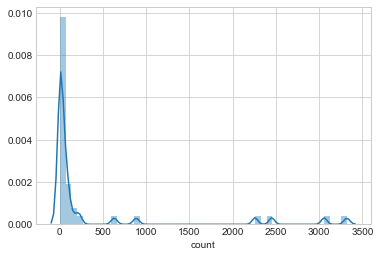

In [49]:
sns.distplot(top_country['count'][top_country['count']<4000])

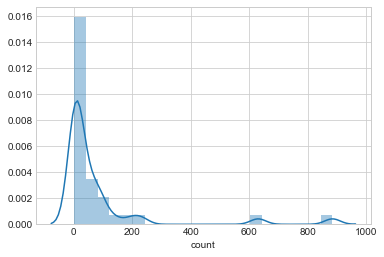

In [50]:
sns.distplot(top_country['count'][top_country['count']<1000])

In [51]:
top_country.describe()

,count
count,48.000000
mean,3144.270833
std,9930.379643
min,1.000000
25%,5.750000
50%,47.500000
75%,1227.500000
max,62397.000000


In [52]:
#std is extremely high-maybe due to less data
data.shape

(150930, 10)

In [53]:
62397/150930     #41 % us-data

0.41341681574239714

In [54]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [55]:
#Analysing points

In [56]:
np.sort(data['points'].unique())[::-1]

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80], dtype=int64)

In [97]:
point_count  = pd.DataFrame(data.groupby('points')['country'].count().sort_values(ascending=False))

In [98]:
point_count.columns=['count']

In [99]:
point_count.head()

,count
points,
87,20747
88,17871
90,15971
86,15573
89,12921


In [100]:
point_count.index[:5]

Int64Index([87, 88, 90, 86, 89], dtype='int64', name='points')

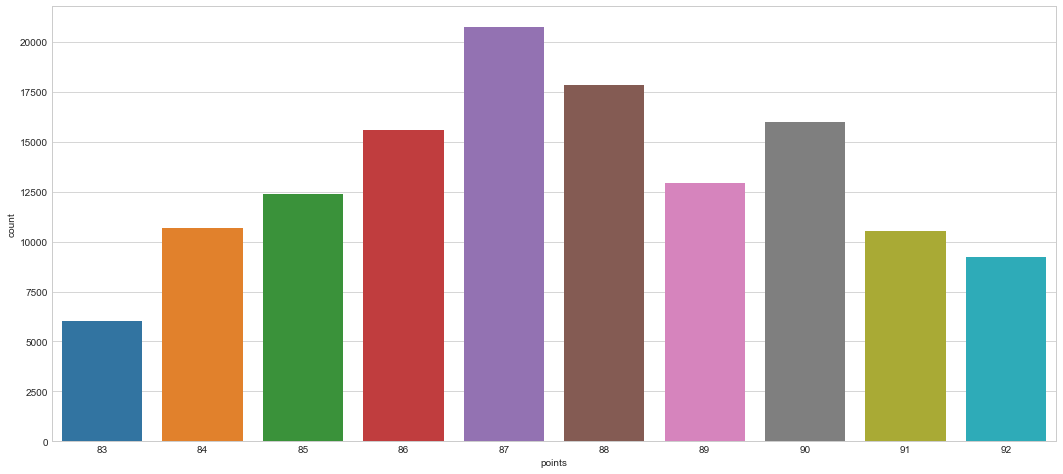

In [102]:
plt.figure(figsize=(18,8))
sns.barplot(x=point_count.index[:10],y='count',data=point_count.head(10))

In [63]:
#data.groupby('points').sum(axis=0)

In [88]:
view = data.groupby(['points','country']).count().reset_index()[['points','country','description']]

In [89]:
view.columns = ['points','country','count']

In [90]:
view.head()

,points,country,count
0,80,Argentina,153
1,80,Australia,9
2,80,Bulgaria,4
3,80,Chile,80
4,80,Cyprus,2


In [91]:
#let us check some points with highest counts

In [93]:
view_87 = view[['country','count']][view['points']==87].sort_values('count',ascending=False)

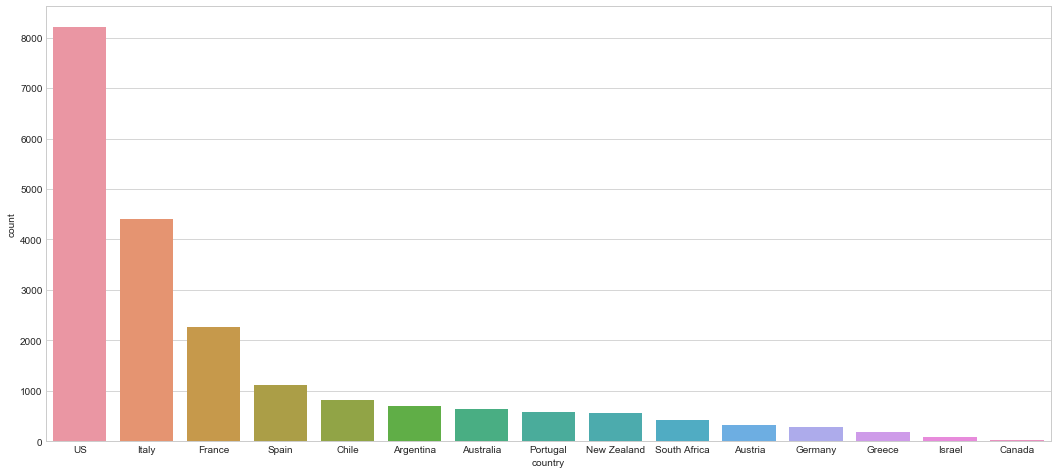

In [94]:
plt.figure(figsize=(18,8))
sns.barplot('country','count',data=view_87.head(15))

In [95]:
view_87.describe()

,count
count,34.000000
mean,610.205882
std,1586.906535
min,1.000000
25%,4.500000
50%,17.500000
75%,522.250000
max,8208.000000


In [103]:
view_88 = view[['country','count']][view['points']==88].sort_values('count',ascending=False)

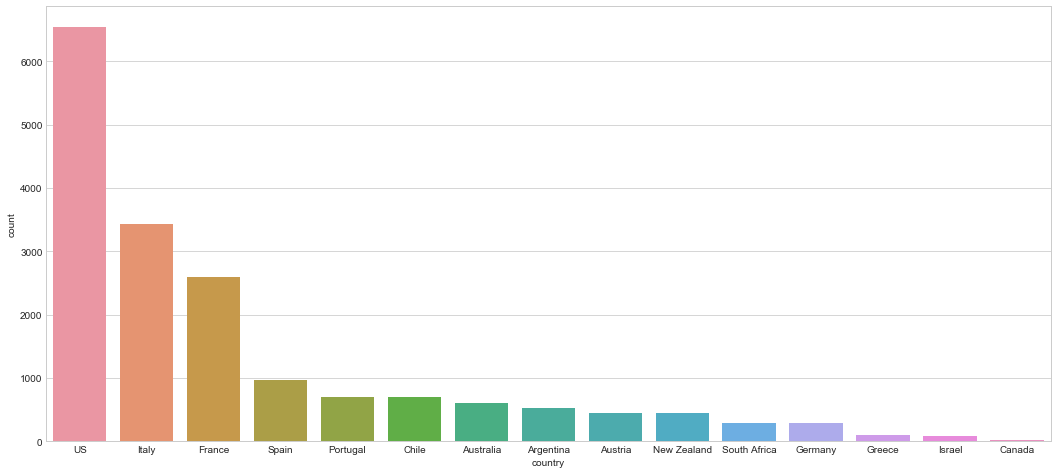

In [104]:
plt.figure(figsize=(18,8))
sns.barplot('country','count',data=view_88.head(15))

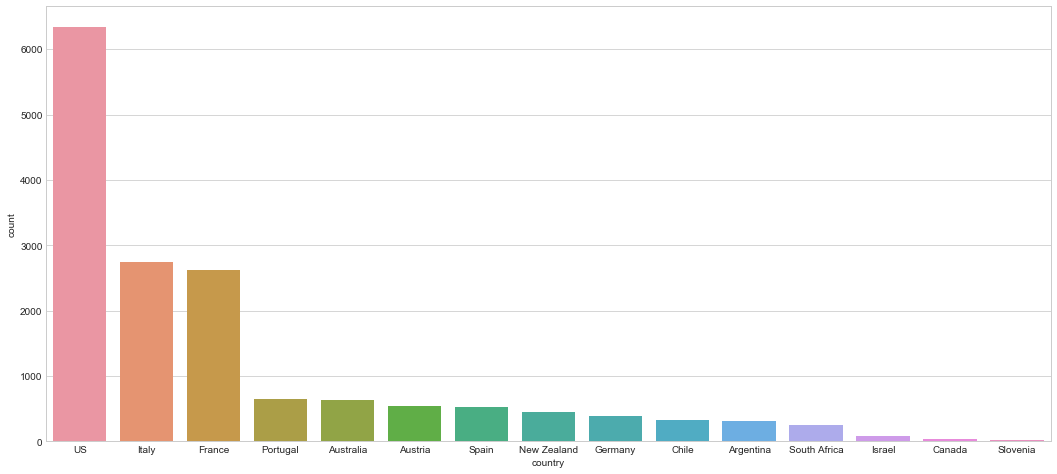

In [105]:
view_90 = view[['country','count']][view['points']==90].sort_values('count',ascending=False)
plt.figure(figsize=(18,8))
sns.barplot('country','count',data=view_90.head(15))

In [118]:
top10 = pd.concat([view_87['country'][:10].reset_index(),view_88['country'][:10].reset_index(),view_90['country'][:10].reset_index()],axis=1)

In [119]:
top10

,index,country,index,country,index,country
0,240,US,274,US,333,US
1,224,Italy,259,Italy,322,Italy
2,217,France,253,France,315,France
3,237,Spain,272,Spain,327,Portugal
4,213,Chile,267,Portugal,309,Australia
5,208,Argentina,250,Chile,310,Austria
6,209,Australia,244,Australia,330,Spain
7,231,Portugal,243,Argentina,326,New Zealand
8,230,New Zealand,245,Austria,317,Germany
9,236,South Africa,266,New Zealand,313,Chile


In [120]:
#top 10 producer are almost same for the wines with maximum points

In [139]:
view_87_88_90  = view[view['points'].isin([87,88,90])]

In [145]:
view_87_88_90 = view_87_88_90.sort_values(['points','count'],ascending=False)

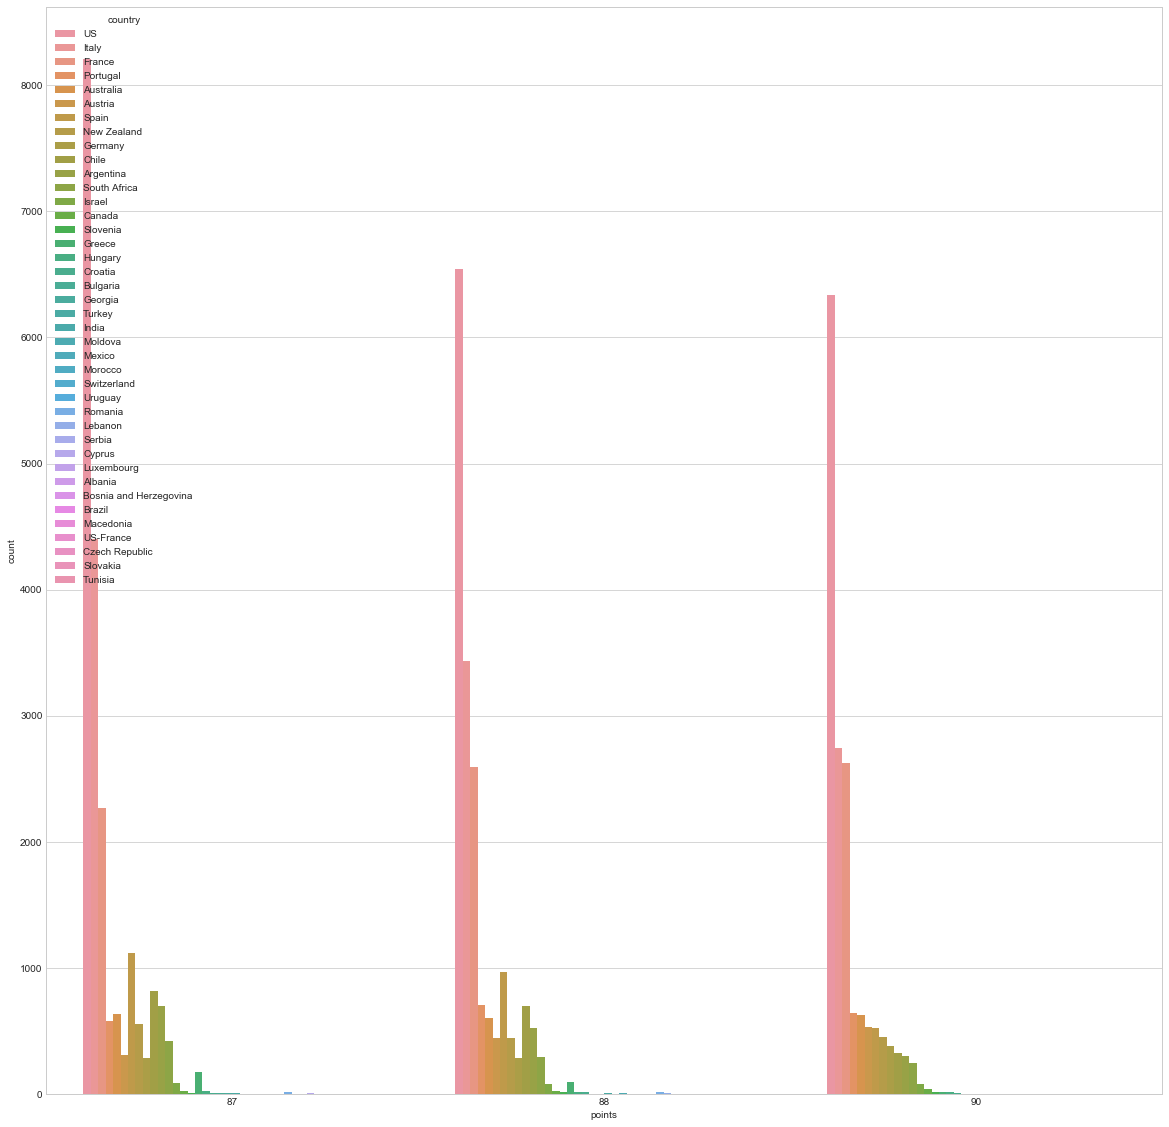

In [148]:
plt.figure(figsize=(20,20))
sns.barplot(x='points',y ='count',hue='country',data=view_87_88_90)

In [149]:
#let us explore some top 10 points

In [152]:
view = view.sort_values(['points','count'],ascending=False)

In [156]:
viewTop10 = view[view['points']>90]

In [160]:
viewTop10.groupby('points')['count'].count()

points
91     23
92     22
93     16
94     14
95     12
96     10
97      9
98      6
99      4
100     4
Name: count, dtype: int64

In [162]:
#let us explore 91-96
viewTop6 = view[(view['points']<97) & (view['points']>90) ]

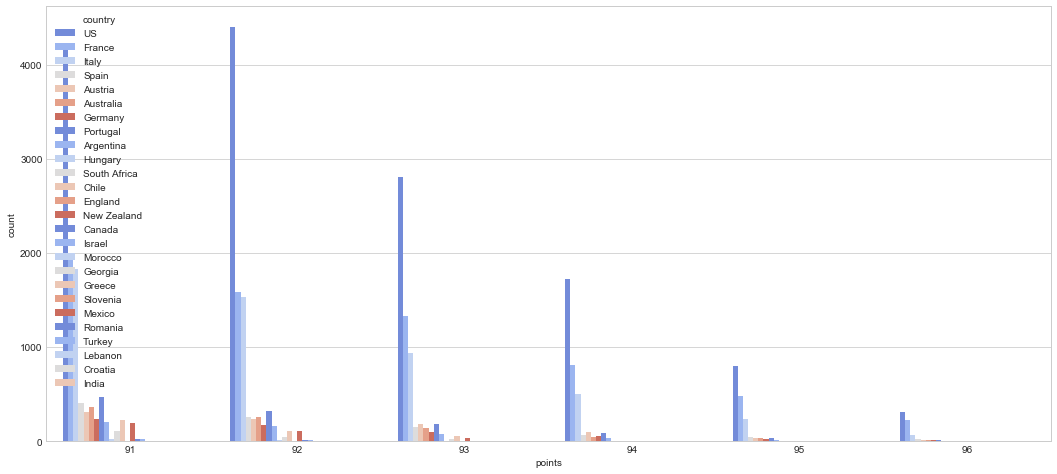

In [173]:
plt.figure(figsize=(18,8))
sns.barplot('points','count','country',viewTop6,palette=cmap)

In [178]:
data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [179]:
#analysing price column

In [181]:
data['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [191]:
#data length is 150930
val = len(data[data['price']>2000])
print("Count is : "+str(val)+" -> % of data = "+str(val/len(data) *100 ))

Count is : 2 -> % of data = 0.0013251176041873716


In [192]:
val = len(data[data['price']>1000])
print("Count is : "+str(val)+" -> % of data = "+str(val/len(data) * 100))

Count is : 10 -> % of data = 0.006625588020936857


In [193]:
val = len(data[data['price']>500])
print("Count is : "+str(val)+" -> % of data = "+str(val/len(data) * 100))

Count is : 73 -> % of data = 0.048366792552839065


In [194]:
val = len(data[data['price']>100])
print("Count is : "+str(val)+" -> % of data = "+str(val/len(data) * 100))

Count is : 3465 -> % of data = 2.2957662492546214


In [195]:
val = len(data[data['price']>50])
print("Count is : "+str(val)+" -> % of data = "+str(val/len(data) * 100))

Count is : 19417 -> % of data = 12.864904260253097


In [201]:
#Only 73 wines with above $500 price

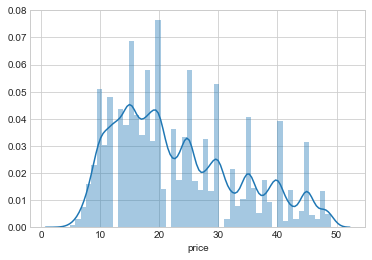

In [202]:
sns.distplot(data['price'][data['price']<50])

In [203]:
#Most of them are in about 18-25 range which is very much relevant with the real world

In [204]:
data.corr()
#medium to strong similiarity between point and price and this is also very much relevant as the price increases as the
#quality increases.

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


In [208]:
price_df = data[['country','points','price']][data['price']>100].sort_values(['points','price'],ascending=False)

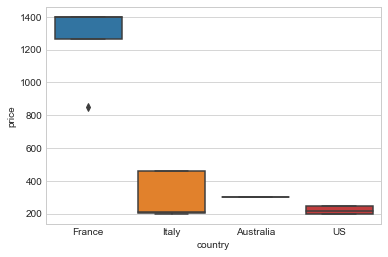

In [212]:
sns.boxplot('country','price',data=price_df[price_df['points']==100])

In [214]:
#We can see that french wines are the costliest when it comes to great quality and US has the least expensive wine in the 
#100-point category.

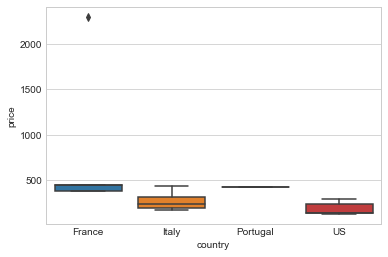

In [216]:
sns.boxplot('country','price',data=price_df[price_df['points']==99])

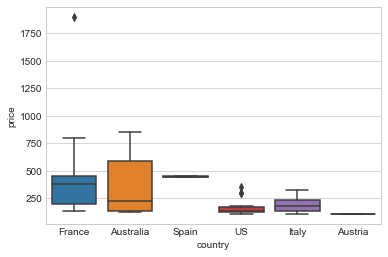

In [217]:
sns.boxplot('country','price',data=price_df[price_df['points']==98])

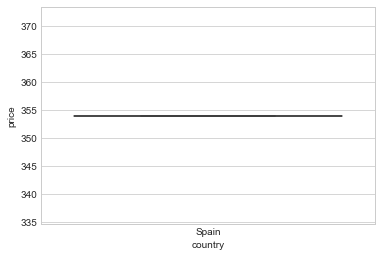

In [220]:
sns.boxplot('country','price',data=price_df[price_df['points']==81])

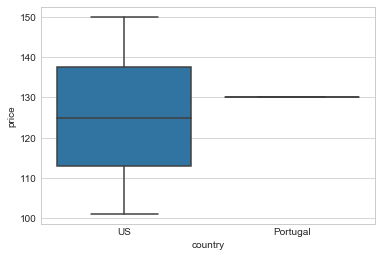

In [221]:
sns.boxplot('country','price',data=price_df[price_df['points']==82])

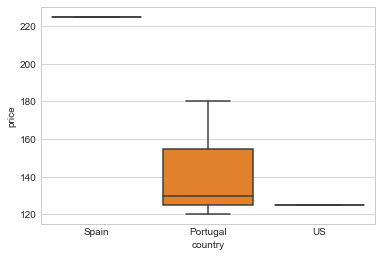

In [222]:
sns.boxplot('country','price',data=price_df[price_df['points']==83])

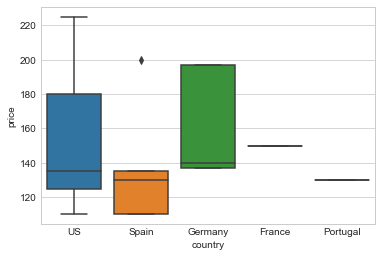

In [223]:
sns.boxplot('country','price',data=price_df[price_df['points']==84])

In [224]:
# We comclude two points - 
# 1.) When it comes to great quality,french wine is most expensive followed by some other european countries like italy,spain
#     portugal . US and Australia offer great qulaity with being least expensive
# 2.) The lowest quality wines comes from US and spain with both having expensive to cheap ranges.

In [225]:
price_df.head()

,country,points,price
26296,France,100,1400.0
51886,France,100,1400.0
83536,France,100,1400.0
2145,France,100,848.0
24151,Italy,100,460.0


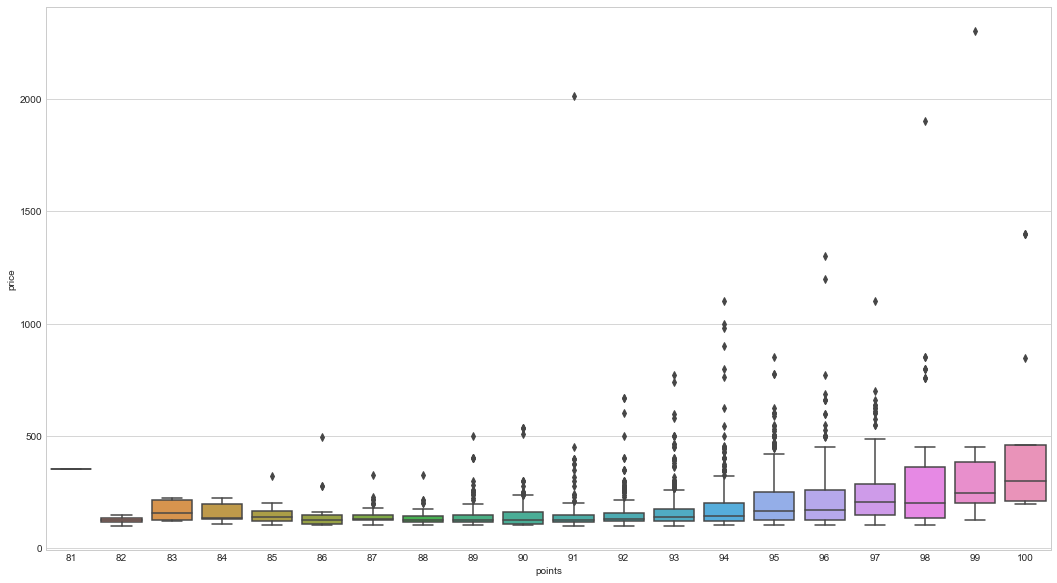

In [228]:
plt.figure(figsize = (18,10))
sns.boxplot(price_df['points'],price_df['price'])

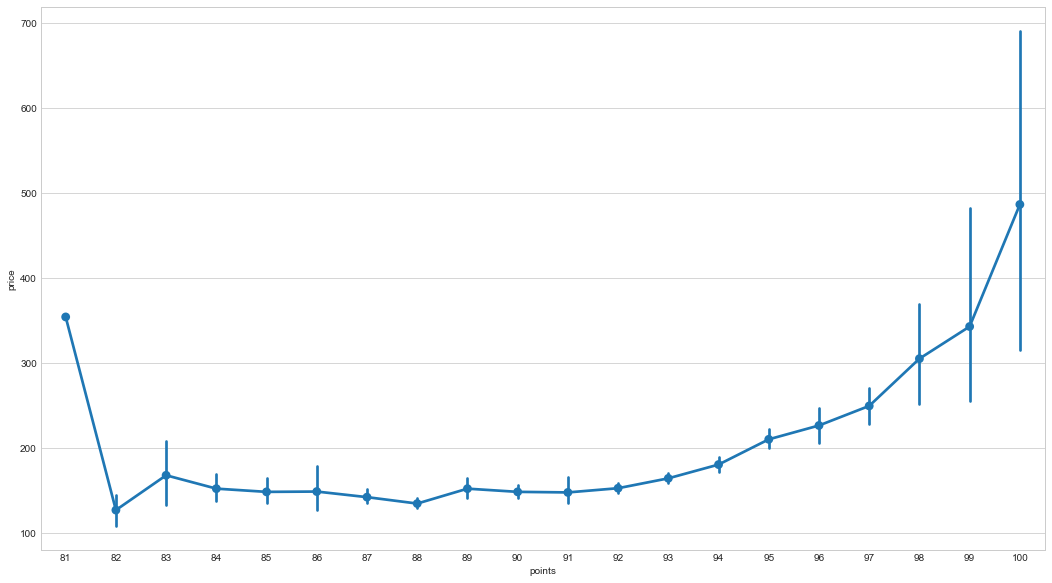

In [230]:
plt.figure(figsize = (18,10))
sns.pointplot(price_df['points'],price_df['price'])

In [231]:
data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')